# Generating Functions

Generating functions are functions that encode sequences of numbers as the coefficients of power series. 

Consider a set $S$ with $n$ elements. 

Pretend there is a picture function' $P(s)\ \forall s\in S$. 

The picture function enables one, for example, to write the multiset $\{1,1,2\}$ as an expression $P(1)^2P(2)$.

The enumerating function $E_p(s)\ :s\in S$ is used to list combinations subject to restraints. For example, the enumerating function for all multisets that include either one or two times some element $a$ and between zero and two times some element $b$ is written:

\begin{equation}
\begin{array}{rl}
E_P(s) &= P(a)+ P(a)^2 + P(a)P(b) + P(a)^2P(b) +  + P(a)P(b)^2 + P(a)^2P(b)^2\\
&\left(P(a) + P(a)^2\right)\left(1 + P(b) + P(b)^2\right)
\end{array}
\end{equation}

This hints at how generating functions can make it easier to keep track of combinations.


## Example: Binomial Theorem

Consider the case of a collection of $n$ indistinguishable objects $s$, and write $P(s) = x$. Then the enumerator for selecting any subset of those $n$ objects is given by: 

\begin{equation}
E_P(s) = \prod_i^n (x^0+x^1) = (1+x)^n = \sum_i^n {n \choose i}x^i
\end{equation}

Where $(x^0 + x^1)$ corresponds to including an element zero or one times. The exponent encodes how many objects were included into a particular subset. This is one way of "proving" the binomial theorem, and one can says $(1_x)^n$ is the generating function for the binomial coefficients ${n \choose i}$. 



## Example: Basket of Goods

An apple costs $20c$, a pear costs $25c$ and a banana costs $30c$. How many different fruit baskets can be bought for $100c$?

By replacing the picture function $P(s)$ with $x$, it was possible to identify subsets of $n$ objects by looking at the exponent of $x^n$ in the enumerating function. In this case, the exponent is supposed to show the price. This can be done by writing $P(apple) = x^{20}, P(pear) = x^{25}$ and $P(banana) = x^{30}$. 

\begin{equation}
E_P(s) = \left( \sum_{i=0}^5 x^{20} \right)\left( \sum_{i=0}^4 x^{25} \right)\left( \sum_{i=0}^3 x^{30} \right)
\end{equation}

Which results in some power series of the form:

\begin{equation}
E_P(s) = 1x^0 + 1x^{20} + 1x^{25} + 1x^{30} + 1x^{40} +... + 2x^{60} + ... + 1x^{290}
\end{equation}

To obtain the number of combinations that correspond to a cost of exactly $100c$, one can apply the operator $\frac{1}{n!}\frac{d^n}{dx^n}$ and set $x=0$ to obtain the desired term. This is what is done with moment generating functions in statistics. 

But actually it is easier to think through what the coefficients will be so that:

\begin{equation}
\sum_{l=0}^{n+m+h}d_l x^l = \left(\sum_{i=0}^n a_i x^i\right)\left(\sum_{j=0}^m b_j x^j\right)\left(\sum_{k=0}^h c_k x^k\right)
\end{equation}

\begin{equation}
d_l = \sum_{\begin{array}{c}i,j,k\\i+j+k=l\end{array}} a_i b_j c_k
\end{equation}

If the coefficients are all '1', which is the case for these combinations, then:

\begin{equation}
d_l = \sum_{\begin{array}{c}i,j,k\\i+j+k=l\end{array}} 1 = {l + 3 - 1 \choose l}
\end{equation}

Which is the number of all multisets of size $l$ and 3 classes. In this case the coefficients are equal to 1 for i=20, j=25, and k=30, and zero otherwise, so that there are 4 ways of summing to 100. Hence, $d_{100} = 4$ for the basket of goods above.

The sum can also be rewritten:

\begin{equation}
d_l = \sum^l_{i=0}\sum^{l-i}_{j=0}\sum^{l-i-j}_{k= l-i-j} a_i b_j c_k
\end{equation}

Where the last sum is actually just over a single term.

## Example: Dice 

How many ways are there for $n$ dice with $k$ faces to show $s$ eyes?

\begin{equation}
E_P = \left(\sum_{i=0}^\infty a_i x^i\right)^n = \sum_{i=0}^{\infty}d_i x^i
\end{equation}

Where $a_i = 1\ \forall i\in(1,k)$ and $a_i = 0$ otherwise. 

\begin{equation}
E_P = \left(\sum_{i=1}^k x^i\right)^n = \left(x(1-x^k)\sum_{i=0}^\infty x^i\right)^n = x^n\left(\frac{1-x^k}{1-x}\right)^n = x^n \left(\sum_{i=0}^n (-1)^i {n \choose i} x^{ik}\right)\left(\sum_{j=0}^{\infty} (-1)^j {-n \choose j} x^j\right)
\end{equation}

The coefficient for $x^s$ is given the sum:

\begin{equation}
d_s = \sum_{ki+j=s-n} (-1)^{i+j}{n \choose i}{-n \choose j}\\
i \in [0,n] \\
j \in [0,\infty]
\end{equation}

Where the indices $i$ and $j$ satisfy $ki+j = s-n$. For example, for $s=7$, $n=2$ and $k=6$:

\begin{equation}
6i+j = 7-2 = 5
\end{equation}

Holds for $i=0, j=5$:

\begin{equation}
d_s = (-1)^5 {2 \choose 0}{-2 \choose 5} = (-1)^{10} 1 {2+5-1 \choose 5} = {6 \choose 5} = \frac{6!}{5!1!} = 6 
\end{equation}

Indeed, there are 6 ways for two d6 to add to 7:

\begin{equation}
[6,1],[5,2],[4,3],[3,4],[2,5],[1,6]
\end{equation}

In [4]:
import warnings

def memoize(func):
    """
    memoizing wrapper to speed up recursion by keeping track of previously calculated values.
    """
    S = {}
    def wrappingfunction(*args):
        if args not in S:
            S[args] = func(*args)
        return S[args]
    return wrappingfunction

@memoize
def factorial(x):
    if x == 0:
        return 1
    else:
        res = 1
        for i in range(1,x+1):
            res *= i
        return res

@memoize
def binomial(n,k):
    if n > 40 or k > 40:
        warnings.warn('careful with large n or k - unresolved numerical stability issues.')
    
    
    if n >= k and k>= 0:
        return int(factorial(n)/(factorial(n-k)*factorial(k)))
    elif n < 0 and k >= 0:
        return int((-1)**k * binomial(-n+k-1,k))
    elif n < 0 and k <= n:
        return int((-1)**(n-k) * binomial(-k-1,n-k))
    else:
        return 0
    
    
f = lambda x: str(x) if x != 0 else '-'
N = 5

print('\t'.join(['     ']+['k=%i' % k for k in range(-N,N+1)]))
for n in range(-N,N+1)[::-1]:
    print('\t'.join(['n=%i' % n]+[f(binomial(n,k)) for k in range(-N,N+1)]))

     	k=-5	k=-4	k=-3	k=-2	k=-1	k=0	k=1	k=2	k=3	k=4	k=5
n=5	-	-	-	-	-	1	5	10	10	5	1
n=4	-	-	-	-	-	1	4	6	4	1	-
n=3	-	-	-	-	-	1	3	3	1	-	-
n=2	-	-	-	-	-	1	2	1	-	-	-
n=1	-	-	-	-	-	1	1	-	-	-	-
n=0	-	-	-	-	-	1	-	-	-	-	-
n=-1	1	-1	1	-1	1	1	-1	1	-1	1	-1
n=-2	-4	3	-2	1	-	1	-2	3	-4	5	-6
n=-3	6	-3	1	-	-	1	-3	6	-10	15	-21
n=-4	-4	1	-	-	-	1	-4	10	-20	35	-56
n=-5	1	-	-	-	-	1	-5	15	-35	70	-126


In [2]:
def d_s(s,n=2,k=6):
    """
    Number of Dice Combinations
    
    n = number of dice
    k = number of dice faces (faces: 1,2,3,4,5,...,k)
    s = sum of dice throw
    
    Beware of numerical stability issues for N >~ 45
    """
    res = 0 
    for i in range(0,int((s-n)/k)+1):
        j = s-n-k*i
        res += (-1)**(i+j) * binomial(n,i) * binomial(-n,j)
    return res
        
print('2 d6')
for s in range(1,14):
    print('s = %i\t' % s, 'd = %i' % d_s(s,n=2,k=6))

2 d6
s = 1	 d = 0
s = 2	 d = 1
s = 3	 d = 2
s = 4	 d = 3
s = 5	 d = 4
s = 6	 d = 5
s = 7	 d = 6
s = 8	 d = 5
s = 9	 d = 4
s = 10	 d = 3
s = 11	 d = 2
s = 12	 d = 1
s = 13	 d = 0


Text(0.5, 1.0, 'Probability of d6 Throw')

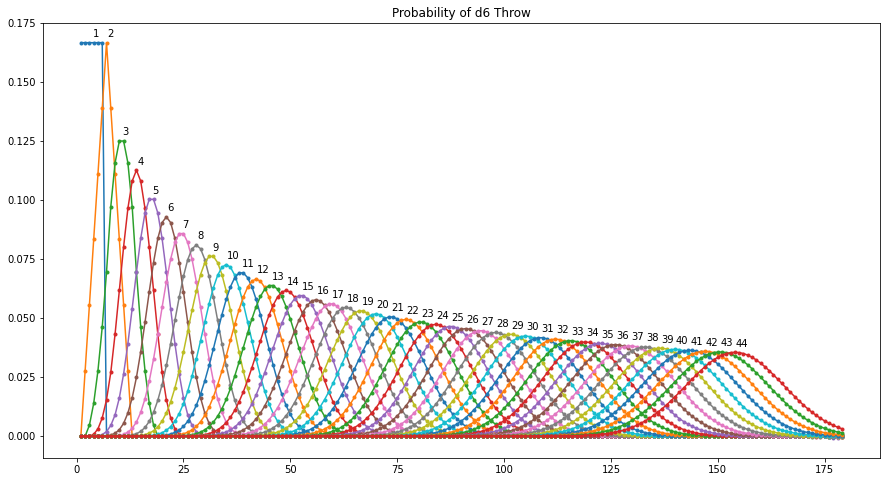

In [6]:
import matplotlib.pyplot as plt
import numpy as np

k = 6 

N = 45
ss = list(range(1,N*(k-2)))
nn = list(range(1,N))


plt.figure(figsize=(15,8))
for n in nn: 
    d = [d_s(s,n=n,k=k) for s in ss]
    d = np.array(d)/np.sum(d)
    
    plt.plot(ss,d,'.-')
    plt.text(x=3.5*n+0.2,y=max(d)+0.0025,s='%i' % n)
    
plt.title('Probability of d6 Throw')